# Getting Started

Downloaded _seqs.fa_ from course website and moved into same directory as iPython notebook. 

Downloaded BioPython using the following the following terminal command: 

**pip3 install biopython**

Downloaded _muscle3.8.31_i86win32.exe_ and _FastTree.exe_ for windows and renamed _muscle_ and _fasttree_ respectively.

 

# Generating a phylogenetic tree

Started Python 

Viewed the contents of _seqs.fa_ by the following command:

**print(open("seqs.fa").read())**

Unaligned sequences from many organisms were printed to the screen. The sequences varied in length between organisms.
(Chose not to display in Jupyter notebook due to heavy lagging)

To align the sequences, I used the following command in the terminal:

**muscle -in seqs.fa -out seqs.aligned.fa**

Viewed the contents of the output file, _seqs.aligned.fa_ in Python by:

**print(open("seqs.aligned.fa").read())**

All the sequences now have interspersed dashes and are the same length. 

In terminal I used the command:

**fasttree -nt < seqs.aligned.fa > tree.nwk**

This generatd the following Newick-formatted tree:

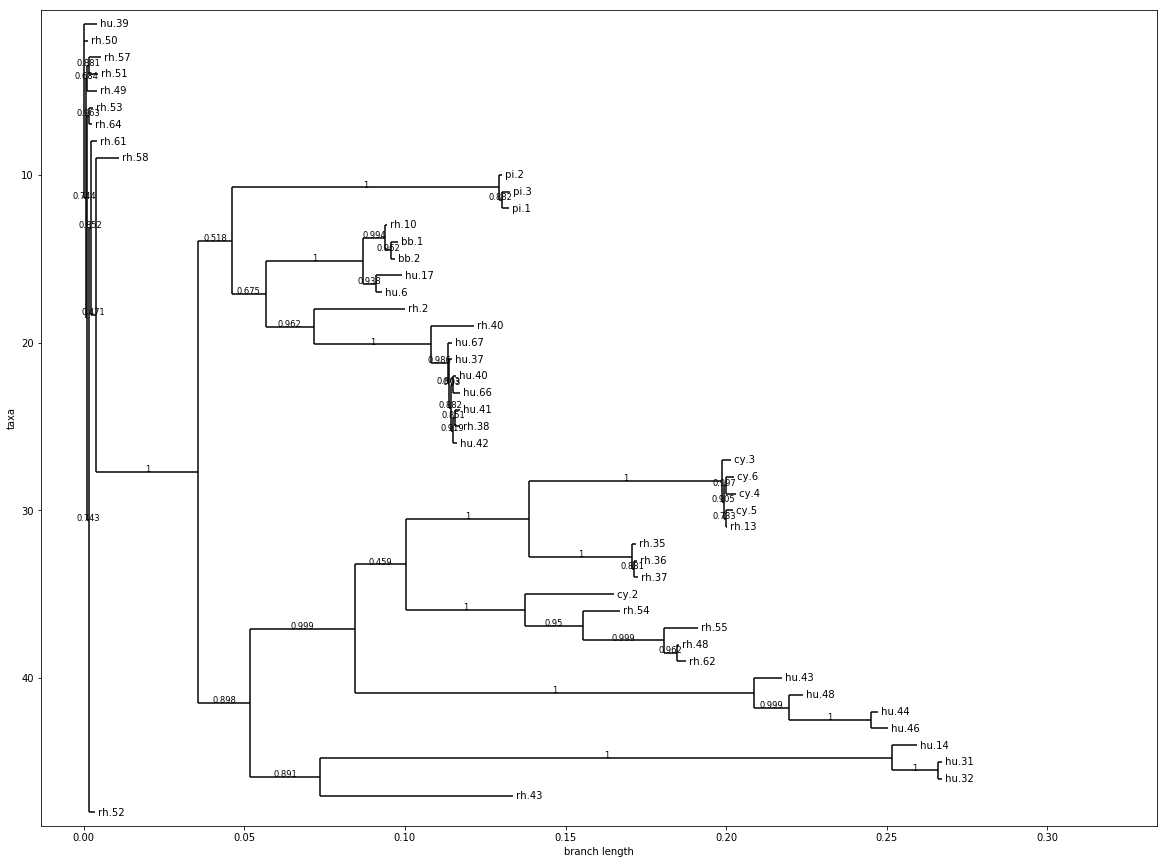

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline 

from Bio import Phylo 
tree = Phylo.read("tree.nwk", "newick")
plt.rcParams['figure.figsize'] = [20, 15]
Phylo.draw(tree)

### Analysis

There are roughly seven clusters:

#### Cluster 1
hu.39, rh.49, rh.50, rh.51, rh.53, rh.57, rh.58, rh.61, rh.64

#### Cluster 2
pi.1, pi.2, pi.3

#### Cluster 3
rh.10, bb.1, bb.2, hu.6, hu.17

#### Cluster 4
hu.37, rh.38, hu.40, hu.41, hu.42, hu.66, hu.67, rh.40

#### Cluster 5
cy.3, cy.4, cy.5, cy.6, rh.13

#### Cluster 6
rh.35, rh.36, rh.37

#### Cluster 7
rh.48, rh.55, rh.62

<br/>


There are also a couple of pairs:
(hu.44, hu.46), (hu.31, hu.32)

And a few that are off on their own:
rh.2, cy.2, rh.54, hu.43, hu.48, rh.43, rh.52



# Identifying sequences by BLAST

Parse _seqs.aligned.fa_ into a dictionary

In [8]:
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq

seqs_dict = SeqIO.to_dict(SeqIO.parse("seqs.aligned.fa", "fasta"))

To run in BLAST, chose the sequences: hu.39, pi.1, bb.1, hu.37, cy.3, rh.35, rh.48

In [9]:
print(seqs_dict["hu.39"].seq)

ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGACCTGAAACCTGGAGCCCCGAAACCCAAAGCCAACCAGCAAAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGCGGCGGACGCAGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAAGCGGGTGACAATCCGTACCTGCGGTATAATCACGCCGACGCCGAGTTTCAGGAGCGTCTGCAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAGAAGCGGGTTCTCGAACCTCTCGGTCTGGTTGAGGAAGGCGCTAAGACGGCTCCTGGAAAGAAGAGACCGGTAGAGCCGTCACCACAGCGTTCCCCCGACTCCTCCACGGGCATCGGCAAGAAAGGCCAGCAGCCCGCCAGAAAGAGACTCAATTTCGGTCGGACTGGCGACTCAGAGTCAGTCCCCGACCCTCAACCTATCGGAGAACCTCCAGCAGCGCCCTCTAGTGTGGGATCTGGTACAATGGCTGCAGGCGGTGGCGCACCAATGGCAGACAATAACGAAGGTGCCGACGGAGTGGGTAGTTCCTCGGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACAGAGTTATCACCACCAGCACCCGAACCTGGGCCCTGCCCACCTACAACAACCACCTCTACAAGCAAATCTCCAACGGGACCTCGGGAGGCAGCACCAACGACAACACCTACTTTGGCTACAGCACCCCCTGGGGGTATCTTGACTTTAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCCAAGAGACTCAGCTTCAAGCTCTTCAACATCCAGGTCAAAGAGGTCACGCAGAATGAAGGCACCAAGA

In [10]:
print(seqs_dict["pi.1"].seq)

ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGCGCTGAAACCTGGAGCCCCGCAACCCAAAGCCAACCAGCAAAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGAGGCGGACGCCGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAAGCGGGTGACAATCCGTACCTGCGGTATAATCACGCCGACGCCGAGTTTCAAGAGCGTCTGCAAGAAGATACGTCCTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAAAAGAGGGTACTCGAGCCTCTGGGTCTGGTTGAGGAAGGCGCTAAGACGGCTCCTGGAAAGAAGCGGCCAGTAGAACCG------------------GACTCCAGCTCGGGCATCGGCAAGTCAGGCCAGCAGCCCGCGAAAAAGAGACTGAATTTTGGGCAGACTGGCGACTCAGAGTCAGTGCCTGACCCCCAACCTCTCTCAGAACCACCCGCAGGTCCCTCTGGTCTGGGATCTGGTACAATGGCTGCTGGCGGTGGCGCTCCAATGGCAGACAATAACGAAGGCGCCGACGGAGTGGGTAATGTCTCAGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACCGAGTCATCACCACCAGCACTCGGACCTGGGCCCTCCCCACCTACAACAACCACCTCTACAAGCAAATCTCCAACGGGACCTCGGGAGGCAGCAGCAACGACAACACCTACTTTGGCTACAGCACCCCCTGGGGGTATTTTGACTTTAACAGATTCCACTGCCACTTTTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGGTTCCGGCCCAAGAAGCTCAACTTCAAGCTCTTCAACATCCAGGTCAAGGAGGTCACCCAGAATGAAGGCACCAAGA

In [11]:
print(seqs_dict["bb.1"].seq)

ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGCGCTGAAACCTGGAGCCCCGAAGCCCAAAGCCAACCAGCAAAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGCGGCGGACGCAGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAAGCGGGTGACAATCCGTACCTGCGGTATAACCACGCCGACGCCGAGTTTCAGGAGCGTCTGCAAGAAGATACGTCTTTTGGGGGCAACCTCGGACGAGCAGTCTTCCAGGCCAAGAAGCGGGTTCTCGAACCTCTCGGTCTGGTTGAGGAAGGCGCTAAGACGGCTCCTGGAAAGAAGAGACCGGTAGAGCCATCACCCCAGCGTTCTCCAGACTCCACTACGGGCATCGGCAAGAAAGGCCAGCAGCCCGCGAAAAAGAGACTCAACTTTGGGCAGACTGGCGACTCAGAGTCAGTGCCCGACCCTCAACCAATCGGAGAACCCCCCGCAGGCCCCTCTGGTCTGGGATCTGGTACAATGGCTGCAGGCGGTGGCGCTCCAATGGCAGACAATAACGAAGGCGCCGACGGAGTGGGTAGTTCCTCAGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACAGAGTCATCACCACCAGCACCCGAACCTGGGCCCTCCCCACCTACAACAACCACCTCTACAAGCAAATCTCCAACGGGACTTCGGGAGGAAGCACCAACGACAACACCTACTTCGGCTACAGCACCCCCTGGGGGTATTTTGACTTTAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCCAAGAGACTCAACTTCAAGCTCTTCAACATCCAGGTCAAGGAGGTCACGCAGAATGAAGGCACCAAGA

In [12]:
print(seqs_dict["hu.37"].seq)

ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGACCTGAAACCTGGAGCCCCCAAGCCCAAGGCCAACCAGCAGAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGCGGCGGACGCAGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAAGCGGGTGACAATCCGTACCTGCGGTATAACCACGCCGACGCCGAGTTTCAGGAGCGTCTGCAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAGAAGCGGGTTCTCGAACCTCTCGGTCTGGTTGAGGAAGCTGCTAAGACGGCTCCTGGAAAGAAGAGACCGGTAGAACCGTCACCTCAGCGTTCCCCCGACTCCTCCACGGGCATCGGCAAGAAAGGCCAGCAGCCCGCTAAAAAGAGACTGAACTTTGGTCAGACTGGCGACTCAGAGTCAGTCCCCGACCCTCAACCAATCGGAGAACCACCAGCAGGCCCCTCTGGTCTGGGATCTGGTACAATGGCTGCAGGCGGTGGCGCTCCAATGGCAGACAATAACGAAGGCGCCGACGGAGTGGGTAGTTCCTCAGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACAGAGTCATCACCACCAGCACCCGAACCTGGGCCCTGCCCACCTACAACAACCACCTCTACAAGCAAATATCCAATGGGACATCGGGAGGAAGCACCAACGACAACACCTACTTCGGCTACAGCACCCCCTGGGGGTATTTTGACTTCAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCAAAAAGACTCAGCTTCAAGCTCTTCAACATCCAGGTCAAGGAGGTCACGCAGAATGAAGGCACCAAGA

In [13]:
print(seqs_dict["cy.3"].seq)

ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGACTTGAAACCTGGAGCCCCGAAACCCAAAGCCAACCAGCAAAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCAGACCCTTCAACGGACTCGACAAGGGAGAGCCGGTCAACGAGGCAGACGCCGCGGCCCTCGAGCACGACAAGGCCTACGACAAGCAGCTCGAGCAGGGGGACAACCCGTACCTCAAGTACAACCACGCCGACGCCGAGTTTCAGGAGCGTCTTCAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAGAAGCGGGTTCTCGAACCTCTCGGTCTGGTTGAGGAAGTCGCTAAGACGGCTCCTGGAAAGAAGAGACCCATAGAA---------------TCCCCCGACTCCTCCACGGGCATCGGCAAGAAAGGCCAGCAGCCCGCTAAAAAGAAGCTCAACTTTGGGCAGACTGGCGACTCAGAGTCAGTGCCCGACCCCCAACCTCTCGGAGAACCTCCCGCCGCGCCCTCAGGTCTGGGATCTGGTACAATGGCTGCAGGCGGTGGCGCACCAATGGCAGACAATAACGAAGGCGCCGACGGAGTGGGTAATGCCTCCGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACAGAGTCATCACCACCAGCACCCGCACCTGGGCCCTGCCCACCTACAACAACCACCTCTACAAGCAGATATCAAGTCAGA------GCGGGGCTACCAACGACAACCACTTCTTCAGCTACAGCACCCCCTGGGGCTATTTTGACTTCAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCCAGAAAGCTGCGGTTCAAGTTGTTCAACATCCAGGTCAAGGAGGTCACGACGAACGACGGCGTTACGA

In [14]:
print(seqs_dict["rh.35"].seq)

ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGACCTGAAACCTGGAGCCCCGAAACCCAAAGCCAACCAGCAAAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGCGGCGGACGCAGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAAGCGGGTGACAATCCGTACCTGCGGTATAACCACGCCGACGCCGAGTTTCAGGAGCGTCTGCAAGAAGATACGTCATTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAGAAGCGGGTTCTCGAACCTCTCGGTCTGGTTGAGGAAGGCGCTAAGACGGCTCCTGGAAAGAAGAGACCCATAGAC---------------TCTCCAGACTCCTCCACGGGCATCGGCAAAAAAGGCCAGCAGCCCGCTAAAAAGAAGCTCAATTTTGGTCAGACTGGCGACTCAGAGTCAGTCCCCGACCCTCAACCTCTTGGAGAACCTCCAGCAGCGCCCTCTAGTGTGGGATCTGGTACAATGGCTGCAGGCGGTGGCGCACCAATGGCAGACAATAACGAAGGTGCCGACGGAGTGGGTAATGCCTCAGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACAGAGTCATCACCACCAGCACCAGAACCTGGGCCCTCCCCACCTACAACAACCACCTCTACAAGCAAATCTCCAGCAGCAGCTC---AGGAGCCACCAATGACAACCACTACTTCGGCTACAGCACCCCCTGGGGGTATTTTGACTTTAACAGATTCCACTGCCACTTCTCACCACGTGACTGGCAGCGACTCATCAACAACAACTGGGGATTCCGGCCCAAGAAGCTGCGGTTCAAGCTCTTCAACATCCAGGTCAAGGAGGTCACAACGAATGACGGCGTCACGA

In [15]:
print(seqs_dict["rh.48"].seq)

ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCTCTCTGAGGGCATTCGCGAGTGGTGGGACCTGAAACCTGGAGCCCCCAAGCCCAAGGCCAACCAGCAGAAGCAGGACGACGGCCGGGGTCTGGTGCTTCCTGGCTACAAGTACCTCGGACCCTTCAACGGACTCGACAAGGGGGAGCCCGTCAACGCGGCGGACGCAGCGGCCCTCGAGCACGACAAGGCCTACGACCAGCAGCTCAAAGCGGGTGACAATCCGTACCTGCGGTATAACCACGCCGACGCCGAGTTTCAGGAGCGTCTGCAAGAAGATACGTCTTTTGGGGGCAACCTCGGGCGAGCAGTCTTCCAGGCCAAGAAGCGGGTTCTCGAACCTCTCGGTCTGGTTGAGGAAGCTGCTAAGACGGCTCCTGGAAAGAAGAGACCGGTAGAACCGTCACCTCAGCGTTCCCCCGACTCCTCCACGGGCATCGGCAAGAAAGGCCAGCAGCCCGCTAGAAAGAGACTGAACTTTGGGCAGACTGGCGACTCAGAGTCAGTCCCCGACCCTCAACCAATCGGAGAACCACCAGCAGGCCCCTCTGGTCTGGGATCTGGTACAATGGCTGCAGGCGGTGGCGCACCAATGGCTGACAATAACAAGGGCGCCGACGGAGTGGGTAATGCCTCAGGAAATTGGCATTGCGATTCCACATGGCTGGGCGACAGAGTCATCACCACCAGCACCCGAACCTGGGCTTTGCCCACCTACAACAACCACCTCTACAAGCAAATCTCCAGTCAG---TCAGCAGGTAGCACCAACGACAACGTCTACTTCGGCTACAGCACCCCCTGGGGGTATTTTGACTTCAACAGATTCCACTGTCACTTCTCACCACGTGACTGGCAGCGGCTCATCAACAGCAACTGGGGATTCCGGCCCAAGAAGCTCAACTTCAAGCTGTTCAACATCCAGGTCAAGGAGGTCACAACGAATGACGGCGTCACGA

### Analysis

According to BLAST results:

**hu.39**: AAV capsid<br/>
**pi.1**: AAV capsid<br/>
**bb.1**: Non-human primate AAV capsid<br/>
**hu.37**: AAV capsid<br/>
**cy.3**: Non-human primate AAV capsid<br/>
**rh.35**: Non-human primate AAV capsid<br/>
**rh.48**: AAV capsid

These sequences all match some form of a gene for an AAV capsid protein.

# Calculating sequence statistics for each cluster

First, define a cluster as list of SeqRecord objects and then align the cluster sequences:


In [187]:
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment

cluster1 = [seqs_dict["hu.39"], seqs_dict["rh.49"], seqs_dict["rh.50"], seqs_dict["rh.51"], seqs_dict["rh.53"], seqs_dict["rh.57"], seqs_dict["rh.58"], seqs_dict["rh.61"], seqs_dict["rh.64"]]

In [188]:
cluster1_align = MultipleSeqAlignment(cluster1[:])
print(cluster1_align)

SingleLetterAlphabet() alignment with 9 rows and 2238 columns
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA hu.39
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.49
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.50
ATGGTTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.51
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.53
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.57
ATGGCTGCTGACGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.58
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.61
ATGGCTGCCGATGGTTATCTTCCAGATTGGCTCGAGGACAACCT...TAA rh.64


Define the other six clusters and align (Unnecessary to print the rest of the alignments):

In [189]:
cluster2 = [seqs_dict["pi.1"], seqs_dict["pi.2"], seqs_dict["pi.3"]]
cluster3 = [seqs_dict["bb.1"], seqs_dict["bb.2"], seqs_dict["hu.6"], seqs_dict["hu.17"], seqs_dict["rh.10"]]
cluster4 = [seqs_dict["hu.37"], seqs_dict["rh.38"], seqs_dict["hu.40"], seqs_dict["hu.41"], seqs_dict["hu.42"], seqs_dict["hu.66"], seqs_dict["hu.67"], seqs_dict["rh.40"]]
cluster5 = [seqs_dict["cy.3"], seqs_dict["cy.4"], seqs_dict["cy.5"], seqs_dict["cy.6"], seqs_dict["rh.13"]]
cluster6 = [seqs_dict["rh.35"], seqs_dict["rh.36"], seqs_dict["rh.37"]]
cluster7 = [seqs_dict["rh.48"], seqs_dict["rh.55"], seqs_dict["rh.62"]]

cluster2_align = MultipleSeqAlignment(cluster2[:])
cluster3_align = MultipleSeqAlignment(cluster3[:])
cluster4_align = MultipleSeqAlignment(cluster4[:])
cluster5_align = MultipleSeqAlignment(cluster5[:])
cluster6_align = MultipleSeqAlignment(cluster6[:])
cluster7_align = MultipleSeqAlignment(cluster7[:])



Calculate the GC/AT fraction in each column of the MSA for each cluster:

### Cluster 1

We can vizualize just the first 100 bases in the sequence to get an idea of how the graph works.

Text(0,0.5,'%AT or %GC')

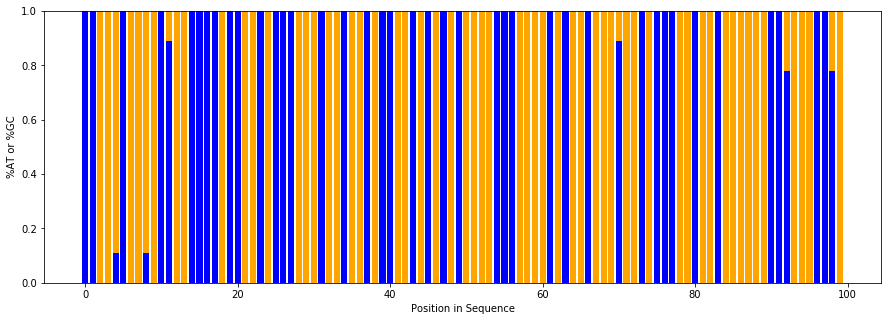

In [75]:
G_C = []
A_T = []
for column in range(100):
    G_C = G_C + [GC(cluster1_align[:,column])/100]
    A_T = A_T + [(100-GC(cluster1_align[:,column]))/100]
    

    
plt.figure(figsize=(15, 5))
plt.bar(np.arange(100), A_T, color = "blue")
plt.bar(np.arange(100), G_C, bottom = A_T, color = "orange")
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')

The graph becomes very condensed when looking at the entire length of the sequence.

Text(0,0.5,'%AT or %GC')

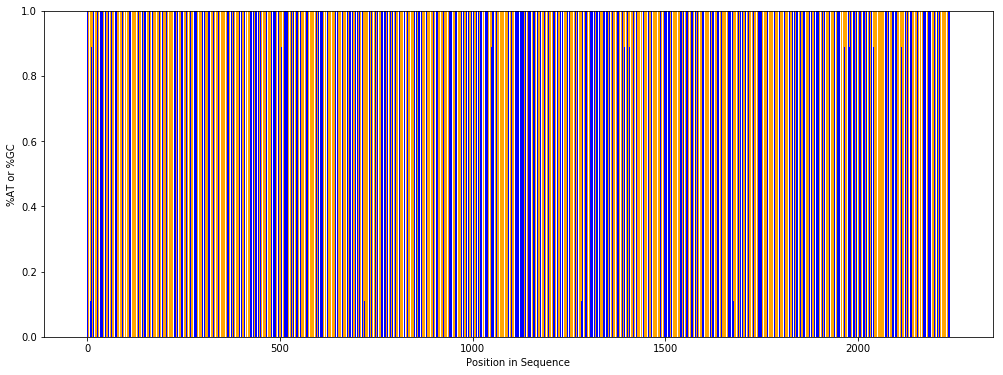

In [63]:
import numpy as np
from Bio.SeqUtils import GC
G_C = []
A_T = []
for column in range(cluster1_align.get_alignment_length()):
    G_C = G_C + [GC(cluster1_align[:,column])/100]
    A_T = A_T + [(100-GC(cluster1_align[:,column]))/100]
    

    
plt.figure(figsize=(17, 6))
plt.bar(np.arange(cluster1_align.get_alignment_length()), A_T, color = "blue")
plt.bar(np.arange(cluster1_align.get_alignment_length()), G_C, bottom = A_T, color = "orange")
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')


### Cluster 2


Text(0,0.5,'%AT or %GC')

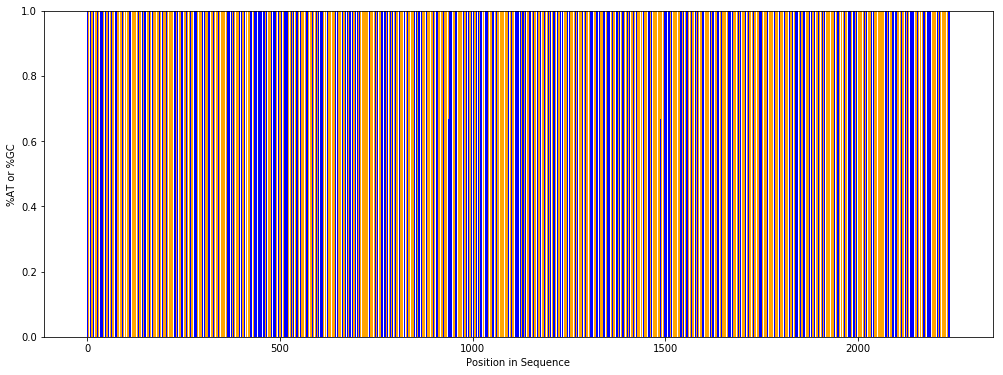

In [65]:
G_C = []
A_T = []
for column in range(cluster2_align.get_alignment_length()):
    G_C = G_C + [GC(cluster2_align[:,column])/100]
    A_T = A_T + [(100-GC(cluster2_align[:,column]))/100]
    

    
plt.figure(figsize=(17, 6))
plt.bar(np.arange(cluster2_align.get_alignment_length()), A_T, color = "blue")
plt.bar(np.arange(cluster2_align.get_alignment_length()), G_C, bottom = A_T, color = "orange")
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')

### Cluster 3

Text(0,0.5,'%AT or %GC')

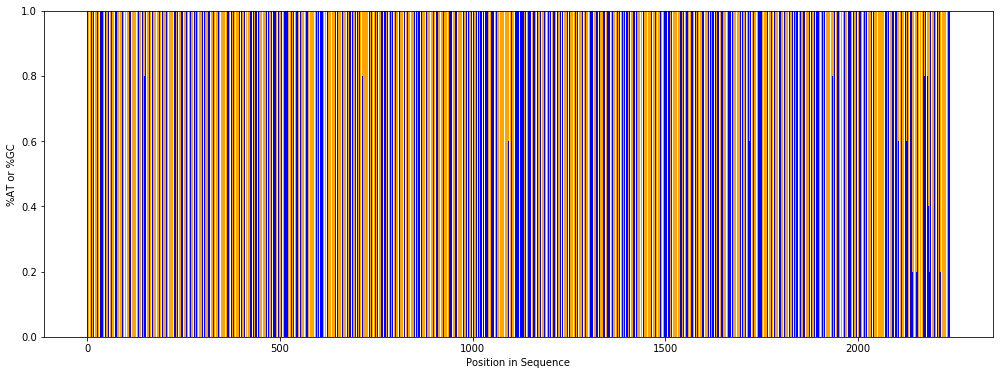

In [66]:
G_C = []
A_T = []
for column in range(cluster3_align.get_alignment_length()):
    G_C = G_C + [GC(cluster3_align[:,column])/100]
    A_T = A_T + [(100-GC(cluster3_align[:,column]))/100]
    

    
plt.figure(figsize=(17, 6))
plt.bar(np.arange(cluster3_align.get_alignment_length()), A_T, color = "blue")
plt.bar(np.arange(cluster3_align.get_alignment_length()), G_C, bottom = A_T, color = "orange")
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')

### Cluster 4

Text(0,0.5,'%AT or %GC')

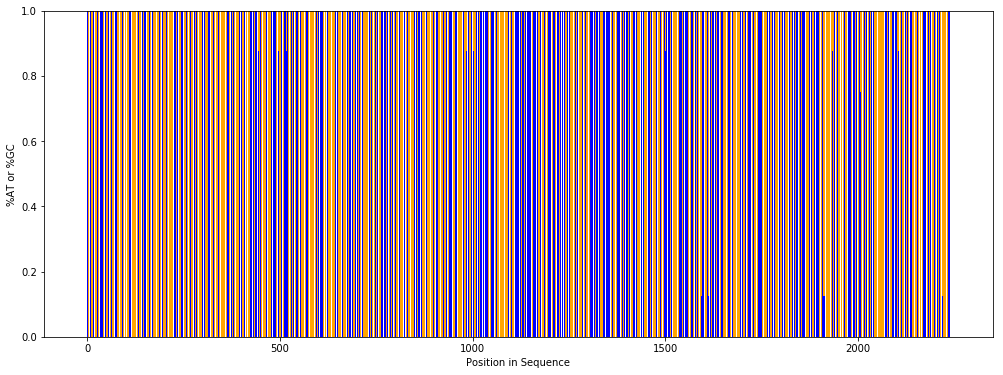

In [67]:
G_C = []
A_T = []
for column in range(cluster4_align.get_alignment_length()):
    G_C = G_C + [GC(cluster4_align[:,column])/100]
    A_T = A_T + [(100-GC(cluster4_align[:,column]))/100]
    

    
plt.figure(figsize=(17, 6))
plt.bar(np.arange(cluster4_align.get_alignment_length()), A_T, color = "blue")
plt.bar(np.arange(cluster4_align.get_alignment_length()), G_C, bottom = A_T, color = "orange")
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')


### Cluster 5

Text(0,0.5,'%AT or %GC')

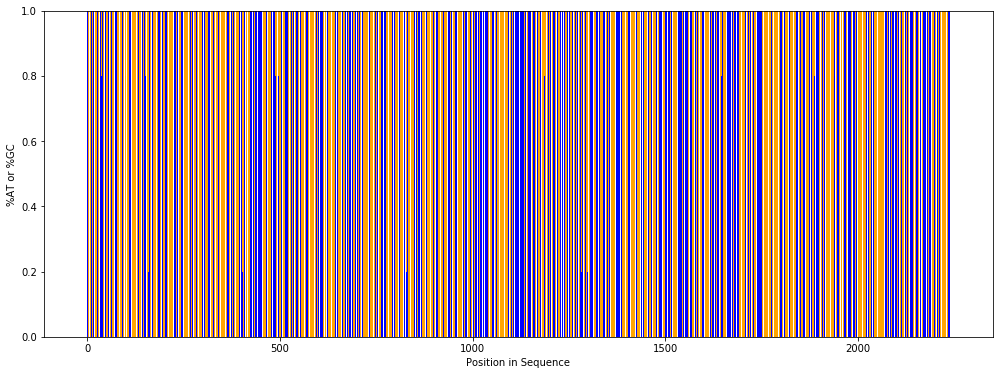

In [68]:
G_C = []
A_T = []
for column in range(cluster5_align.get_alignment_length()):
    G_C = G_C + [GC(cluster5_align[:,column])/100]
    A_T = A_T + [(100-GC(cluster5_align[:,column]))/100]
    

    
plt.figure(figsize=(17, 6))
plt.bar(np.arange(cluster5_align.get_alignment_length()), A_T, color = "blue")
plt.bar(np.arange(cluster5_align.get_alignment_length()), G_C, bottom = A_T, color = "orange")
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')

### Cluster 6

Text(0,0.5,'%AT or %GC')

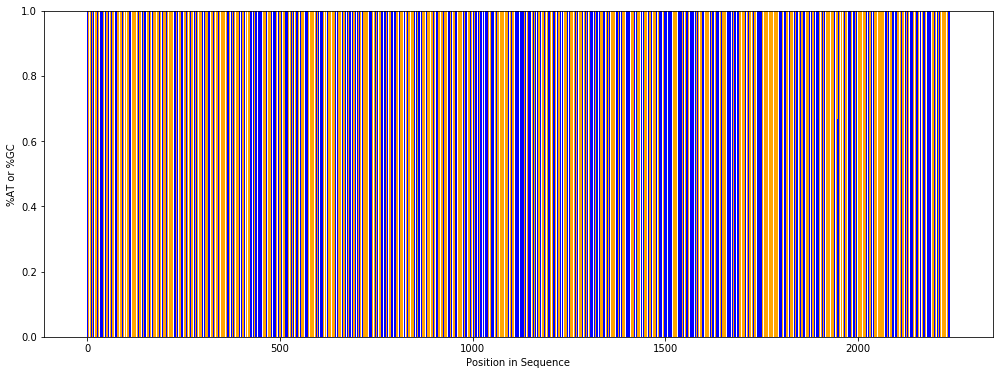

In [69]:
G_C = []
A_T = []
for column in range(cluster6_align.get_alignment_length()):
    G_C = G_C + [GC(cluster6_align[:,column])/100]
    A_T = A_T + [(100-GC(cluster6_align[:,column]))/100]
    

    
plt.figure(figsize=(17, 6))
plt.bar(np.arange(cluster6_align.get_alignment_length()), A_T, color = "blue")
plt.bar(np.arange(cluster6_align.get_alignment_length()), G_C, bottom = A_T, color = "orange")
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')

### Cluster 7

Text(0,0.5,'%AT or %GC')

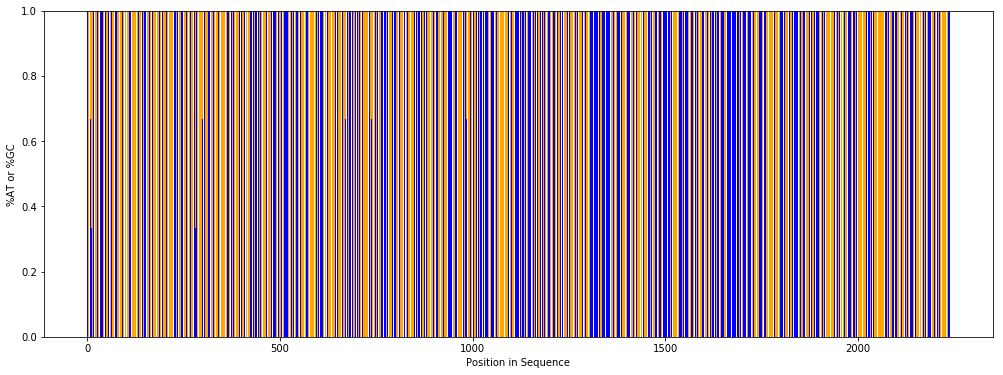

In [76]:
G_C = []
A_T = []
for column in range(cluster7_align.get_alignment_length()):
    G_C = G_C + [GC(cluster7_align[:,column])/100]
    A_T = A_T + [(100-GC(cluster7_align[:,column]))/100]
    

    
plt.figure(figsize=(17, 6))
plt.bar(np.arange(cluster7_align.get_alignment_length()), A_T, color = "blue")
plt.bar(np.arange(cluster7_align.get_alignment_length()), G_C, bottom = A_T, color = "orange")
plt.xlabel('Position in Sequence')
plt.ylabel('%AT or %GC')

## Sequence length distribution in each cluster

Have to parse the unaligned _seqs.fa_ into a dictionary and then group the clusters

In [169]:
unaligned_seqs = SeqIO.to_dict(SeqIO.parse("seqs.fa", "fasta"))

cl1 = [unaligned_seqs["hu.39"], unaligned_seqs["rh.49"], unaligned_seqs["rh.50"], unaligned_seqs["rh.51"], unaligned_seqs["rh.53"], unaligned_seqs["rh.57"], unaligned_seqs["rh.58"], unaligned_seqs["rh.61"], unaligned_seqs["rh.64"]]
cl2 = [unaligned_seqs["pi.1"], unaligned_seqs["pi.2"], unaligned_seqs["pi.3"]]
cl3 = [unaligned_seqs["bb.1"], unaligned_seqs["bb.2"], unaligned_seqs["hu.6"], unaligned_seqs["hu.17"], unaligned_seqs["rh.10"]]
cl4 = [unaligned_seqs["hu.37"], unaligned_seqs["rh.38"], unaligned_seqs["hu.40"], unaligned_seqs["hu.41"], unaligned_seqs["hu.42"], unaligned_seqs["hu.66"], unaligned_seqs["hu.67"], unaligned_seqs["rh.40"]]
cl5 = [unaligned_seqs["cy.3"], unaligned_seqs["cy.4"], unaligned_seqs["cy.5"], unaligned_seqs["cy.6"], unaligned_seqs["rh.13"]]
cl6 = [unaligned_seqs["rh.35"], unaligned_seqs["rh.36"], unaligned_seqs["rh.37"]]
cl7 = [unaligned_seqs["rh.48"], unaligned_seqs["rh.55"], unaligned_seqs["rh.62"]]






In [171]:
cluster_lengths = {}
clusters = [cl1, cl2, cl3, cl4, cl5, cl6, cl7]
for idx in range(1,len(clusters)+1):
    cluster_lengths['clust%s' % idx] = list(len(clusters[idx-1][n]) for n in range(len(clusters[idx-1])))

ValueError: Dimensions of labels and X must be compatible

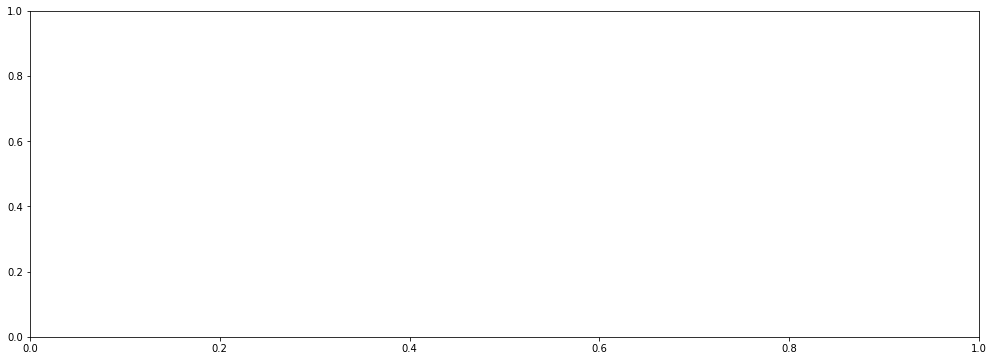

In [222]:
plt.figure(figsize=(17,6))

line_out = plt.boxplot(cluster_lengths, labels=['Clust1', 'Clust2', 'Clust3', 'Clust4', 'Clust5', 'Clust6', 'Clust7'])

plt.tight_layout()
plt.ylabel('Sequence Length')
plt.show()